<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_19/CS166_PCW_Session_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]["state"] = 1 if random() < 0.5 else 0
    global steps
    steps = 0


def observe():
    global g
    cla()
    nx.draw(
        g, vmin=0, vmax=1, node_color=[g.nodes[i]["state"] for i in g.nodes], pos=g.pos
    )


def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]["state"] = g.nodes[speaker]["state"]

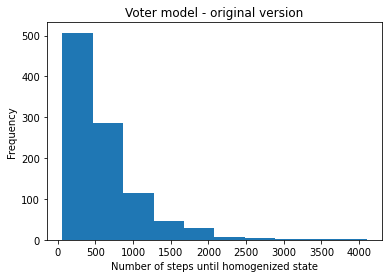

In [8]:
import matplotlib.pyplot as plt

def run_experiment(init_func, update_func, repeats, title):
    results = []

    for _ in range(repeats):
        init_func()
        steps = 0
        states = set(nx.get_node_attributes(g, 'state').values())
        while len(states) != 1:
            steps += 1
            update_func()
            states = set(nx.get_node_attributes(g, 'state').values())
        results.append(steps)

    plt.hist(results)
    plt.xlabel("Number of steps until homogenized state")
    plt.ylabel("Frequency")
    plt.title(title)
    return results

results_original = run_experiment(initialize, update, 1000, "Voter model - original version")

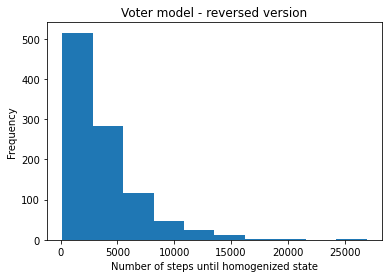

In [9]:
def update_reverse():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]["state"] = g.nodes[speaker]["state"]

def update_edge_based():
    global g
    edge = rd.choice(list(g.edges))
    speaker, listener = random.choice(edge, 2)
    g.nodes[listener]["state"] = g.nodes[speaker]["state"]

results_reversed = run_experiment(initialize, update_reverse, 1000, "Voter model - reversed version")

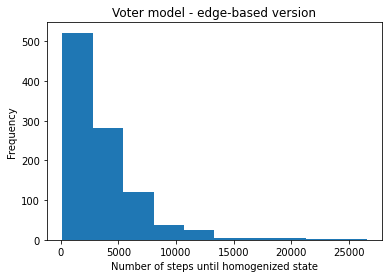

In [10]:
results_edge_based = run_experiment(initialize, update_reverse, 1000, "Voter model - edge-based version")

In [11]:
import numpy as np

print(f"Mean of original version of voter model: {np.mean(results_original)}")
print(f"Mean of reversed version of voter model: {np.mean(results_reversed)}")
print(f"Mean of edge-based version of voter model: {np.mean(results_edge_based)}")

Mean of original version of voter model: 616.702
Mean of reversed version of voter model: 3686.946
Mean of edge-based version of voter model: 3588.186


The number of steps taken to get to the homogenized state is a lot more for reversed and edge-based version than original version.